### Importing libraries and loading data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv("Ames_Housing_Data.csv")

In [3]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

### Exploring Corelation

In [5]:
corr=df.corr()['SalePrice']
corr

PID               -0.246521
MS SubClass       -0.085092
Lot Frontage       0.357318
Lot Area           0.266549
Overall Qual       0.799262
Overall Cond      -0.101697
Year Built         0.558426
Year Remod/Add     0.532974
Mas Vnr Area       0.508285
BsmtFin SF 1       0.432914
BsmtFin SF 2       0.005891
Bsmt Unf SF        0.182855
Total Bsmt SF      0.632280
1st Flr SF         0.621676
2nd Flr SF         0.269373
Low Qual Fin SF   -0.037660
Gr Liv Area        0.706780
Bsmt Full Bath     0.276050
Bsmt Half Bath    -0.035835
Full Bath          0.545604
Half Bath          0.285056
Bedroom AbvGr      0.143913
Kitchen AbvGr     -0.119814
TotRms AbvGrd      0.495474
Fireplaces         0.474558
Garage Yr Blt      0.526965
Garage Cars        0.647877
Garage Area        0.640401
Wood Deck SF       0.327143
Open Porch SF      0.312951
Enclosed Porch    -0.128787
3Ssn Porch         0.032225
Screen Porch       0.112151
Pool Area          0.068403
Misc Val          -0.015691
Mo Sold            0

### Saleprice vs ovarall quality

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

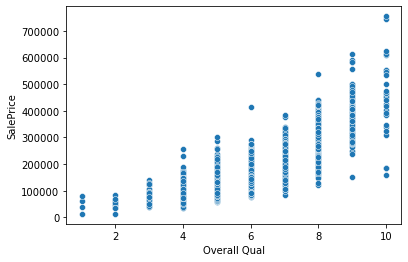

In [6]:
sns.scatterplot(x='Overall Qual', y= 'SalePrice', data=df)

### SalePrice vs Gr Liv Area

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

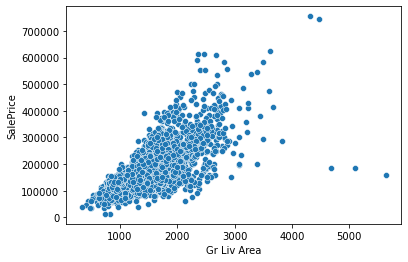

In [7]:
sns.scatterplot(x='Gr Liv Area', y= 'SalePrice', data=df)

In [8]:
df[(df['Overall Qual']>8)& (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [9]:
drop_ind=df[(df['Gr Liv Area']>4000)& (df['SalePrice']<400000)].index

In [10]:
df=df.drop(drop_ind,axis=0)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

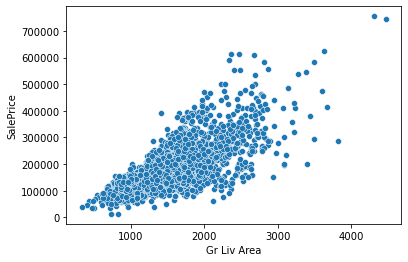

In [11]:
sns.scatterplot(x='Gr Liv Area', y= 'SalePrice', data=df)

In [12]:
with open("Ames_Housing_Feature_Description.txt","r") as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

In [14]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [15]:
df=df.drop("PID",axis=1)

In [16]:
df.shape

(2927, 80)

### Dealing with missing values

In [17]:
missing_per= 100*df.isnull().sum()/len(df)

In [18]:
missing_percent=missing_per[missing_per>0].sort_values()

In [19]:
missing_percent

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

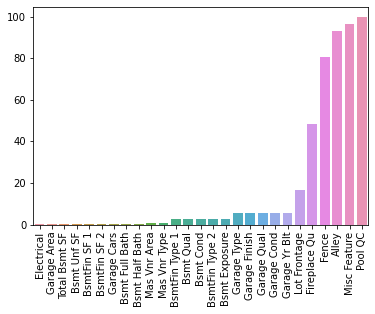

In [20]:
sns.barplot(x=missing_percent.index, y=missing_percent)
plt.xticks(rotation=90);

In [21]:
missing_percent[missing_percent<1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [22]:
100/len(df)

0.0341646737273659

In [23]:
df[df['Electrical'].isnull()]['Garage Area']

1577    400.0
Name: Garage Area, dtype: float64

In [24]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [25]:
df=df.dropna(axis=0, subset=['Electrical','Garage Cars'])

In [26]:
missing_per= 100*df.isnull().sum()/len(df)
missing_percent=missing_per[missing_per>0].sort_values()
missing_percent


Bsmt Unf SF        0.034188
Total Bsmt SF      0.034188
BsmtFin SF 2       0.034188
BsmtFin SF 1       0.034188
Bsmt Full Bath     0.068376
Bsmt Half Bath     0.068376
Mas Vnr Type       0.786325
Mas Vnr Area       0.786325
Bsmt Qual          2.735043
Bsmt Cond          2.735043
BsmtFin Type 1     2.735043
BsmtFin Type 2     2.769231
Bsmt Exposure      2.837607
Garage Type        5.367521
Garage Qual        5.401709
Garage Cond        5.401709
Garage Finish      5.401709
Garage Yr Blt      5.401709
Lot Frontage      16.752137
Fireplace Qu      48.547009
Fence             80.478632
Alley             93.230769
Misc Feature      96.410256
Pool QC           99.589744
dtype: float64

In [27]:
missing_percent[missing_percent<1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
dtype: float64

In [28]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [29]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [30]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [31]:
# BSMT NUMERIC COLUMNS --> fillna 0
bsmt_num_cols=['BsmtFin SF 1','BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF','Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols]=df[bsmt_num_cols].fillna(0)

#BSMT STRING COLUMNS
bsmt_str_cols = ['Bsmt Qual','Bsmt Exposure','Bsmt Cond','BsmtFin Type 1','BsmtFin Type 2']
df[bsmt_str_cols]=df[bsmt_str_cols].fillna('None')

In [32]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [33]:
missing_per= 100*df.isnull().sum()/len(df)
missing_percent=missing_per[missing_per>0].sort_values()
missing_percent

Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
Garage Type       5.367521
Garage Yr Blt     5.401709
Garage Finish     5.401709
Garage Qual       5.401709
Garage Cond       5.401709
Lot Frontage     16.752137
Fireplace Qu     48.547009
Fence            80.478632
Alley            93.230769
Misc Feature     96.410256
Pool QC          99.589744
dtype: float64

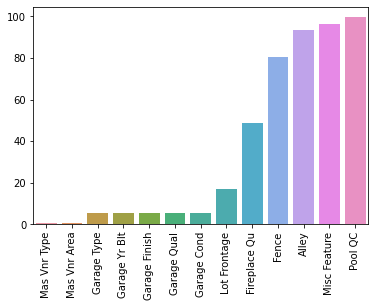

In [34]:
sns.barplot(x=missing_percent.index, y=missing_percent)
plt.xticks(rotation=90);

In [35]:
df['Mas Vnr Type']=df['Mas Vnr Type'].fillna('None')

In [36]:
df['Mas Vnr Area']=df['Mas Vnr Area'].fillna(0)

In [37]:
missing_per= 100*df.isnull().sum()/len(df)
missing_percent=missing_per[missing_per>0].sort_values()
missing_percent

Garage Type       5.367521
Garage Yr Blt     5.401709
Garage Finish     5.401709
Garage Qual       5.401709
Garage Cond       5.401709
Lot Frontage     16.752137
Fireplace Qu     48.547009
Fence            80.478632
Alley            93.230769
Misc Feature     96.410256
Pool QC          99.589744
dtype: float64

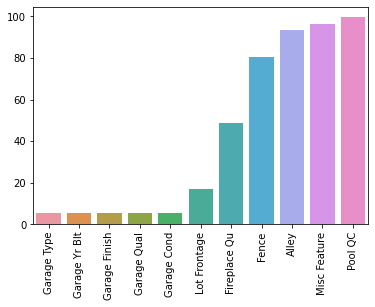

In [38]:
sns.barplot(x=missing_percent.index, y=missing_percent)
plt.xticks(rotation=90);

In [39]:
gar_str_cols =['Garage Type','Garage Finish', 'Garage Qual', 'Garage Cond']

In [40]:
df[gar_str_cols]=df[gar_str_cols].fillna('None')

In [41]:
missing_per= 100*df.isnull().sum()/len(df)
missing_percent=missing_per[missing_per>0].sort_values()
missing_percent

Garage Yr Blt     5.401709
Lot Frontage     16.752137
Fireplace Qu     48.547009
Fence            80.478632
Alley            93.230769
Misc Feature     96.410256
Pool QC          99.589744
dtype: float64

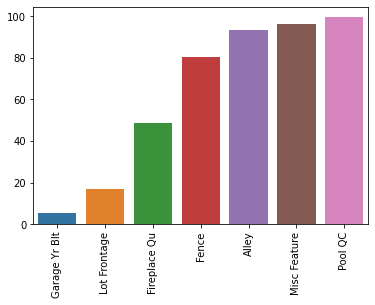

In [42]:
sns.barplot(x=missing_percent.index, y=missing_percent)
plt.xticks(rotation=90);

In [43]:
df['Garage Yr Blt']= df['Garage Yr Blt'].fillna(0)

In [44]:
missing_per= 100*df.isnull().sum()/len(df)
missing_percent=missing_per[missing_per>0].sort_values()
missing_percent

Lot Frontage    16.752137
Fireplace Qu    48.547009
Fence           80.478632
Alley           93.230769
Misc Feature    96.410256
Pool QC         99.589744
dtype: float64

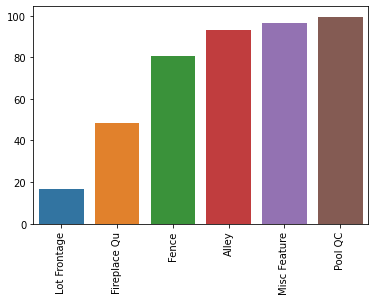

In [45]:
sns.barplot(x=missing_percent.index, y=missing_percent)
plt.xticks(rotation=90);

In [46]:
df= df.drop(['Pool QC','Misc Feature','Alley', 'Fence'], axis=1)

In [47]:
missing_per= 100*df.isnull().sum()/len(df)
missing_percent=missing_per[missing_per>0].sort_values()
missing_percent

Lot Frontage    16.752137
Fireplace Qu    48.547009
dtype: float64

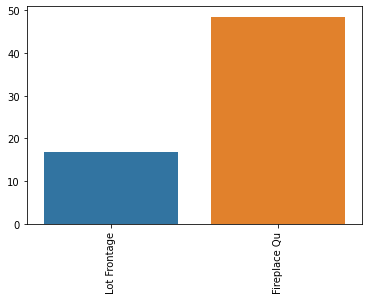

In [48]:
sns.barplot(x=missing_percent.index, y=missing_percent)
plt.xticks(rotation=90);

In [49]:
df['Fireplace Qu'].value_counts()

Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

In [50]:
df['Fireplace Qu']=df['Fireplace Qu'].fillna('None')

In [51]:
df['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2925     37.0
2926      NaN
2927     62.0
2928     77.0
2929     74.0
Name: Lot Frontage, Length: 2925, dtype: float64

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

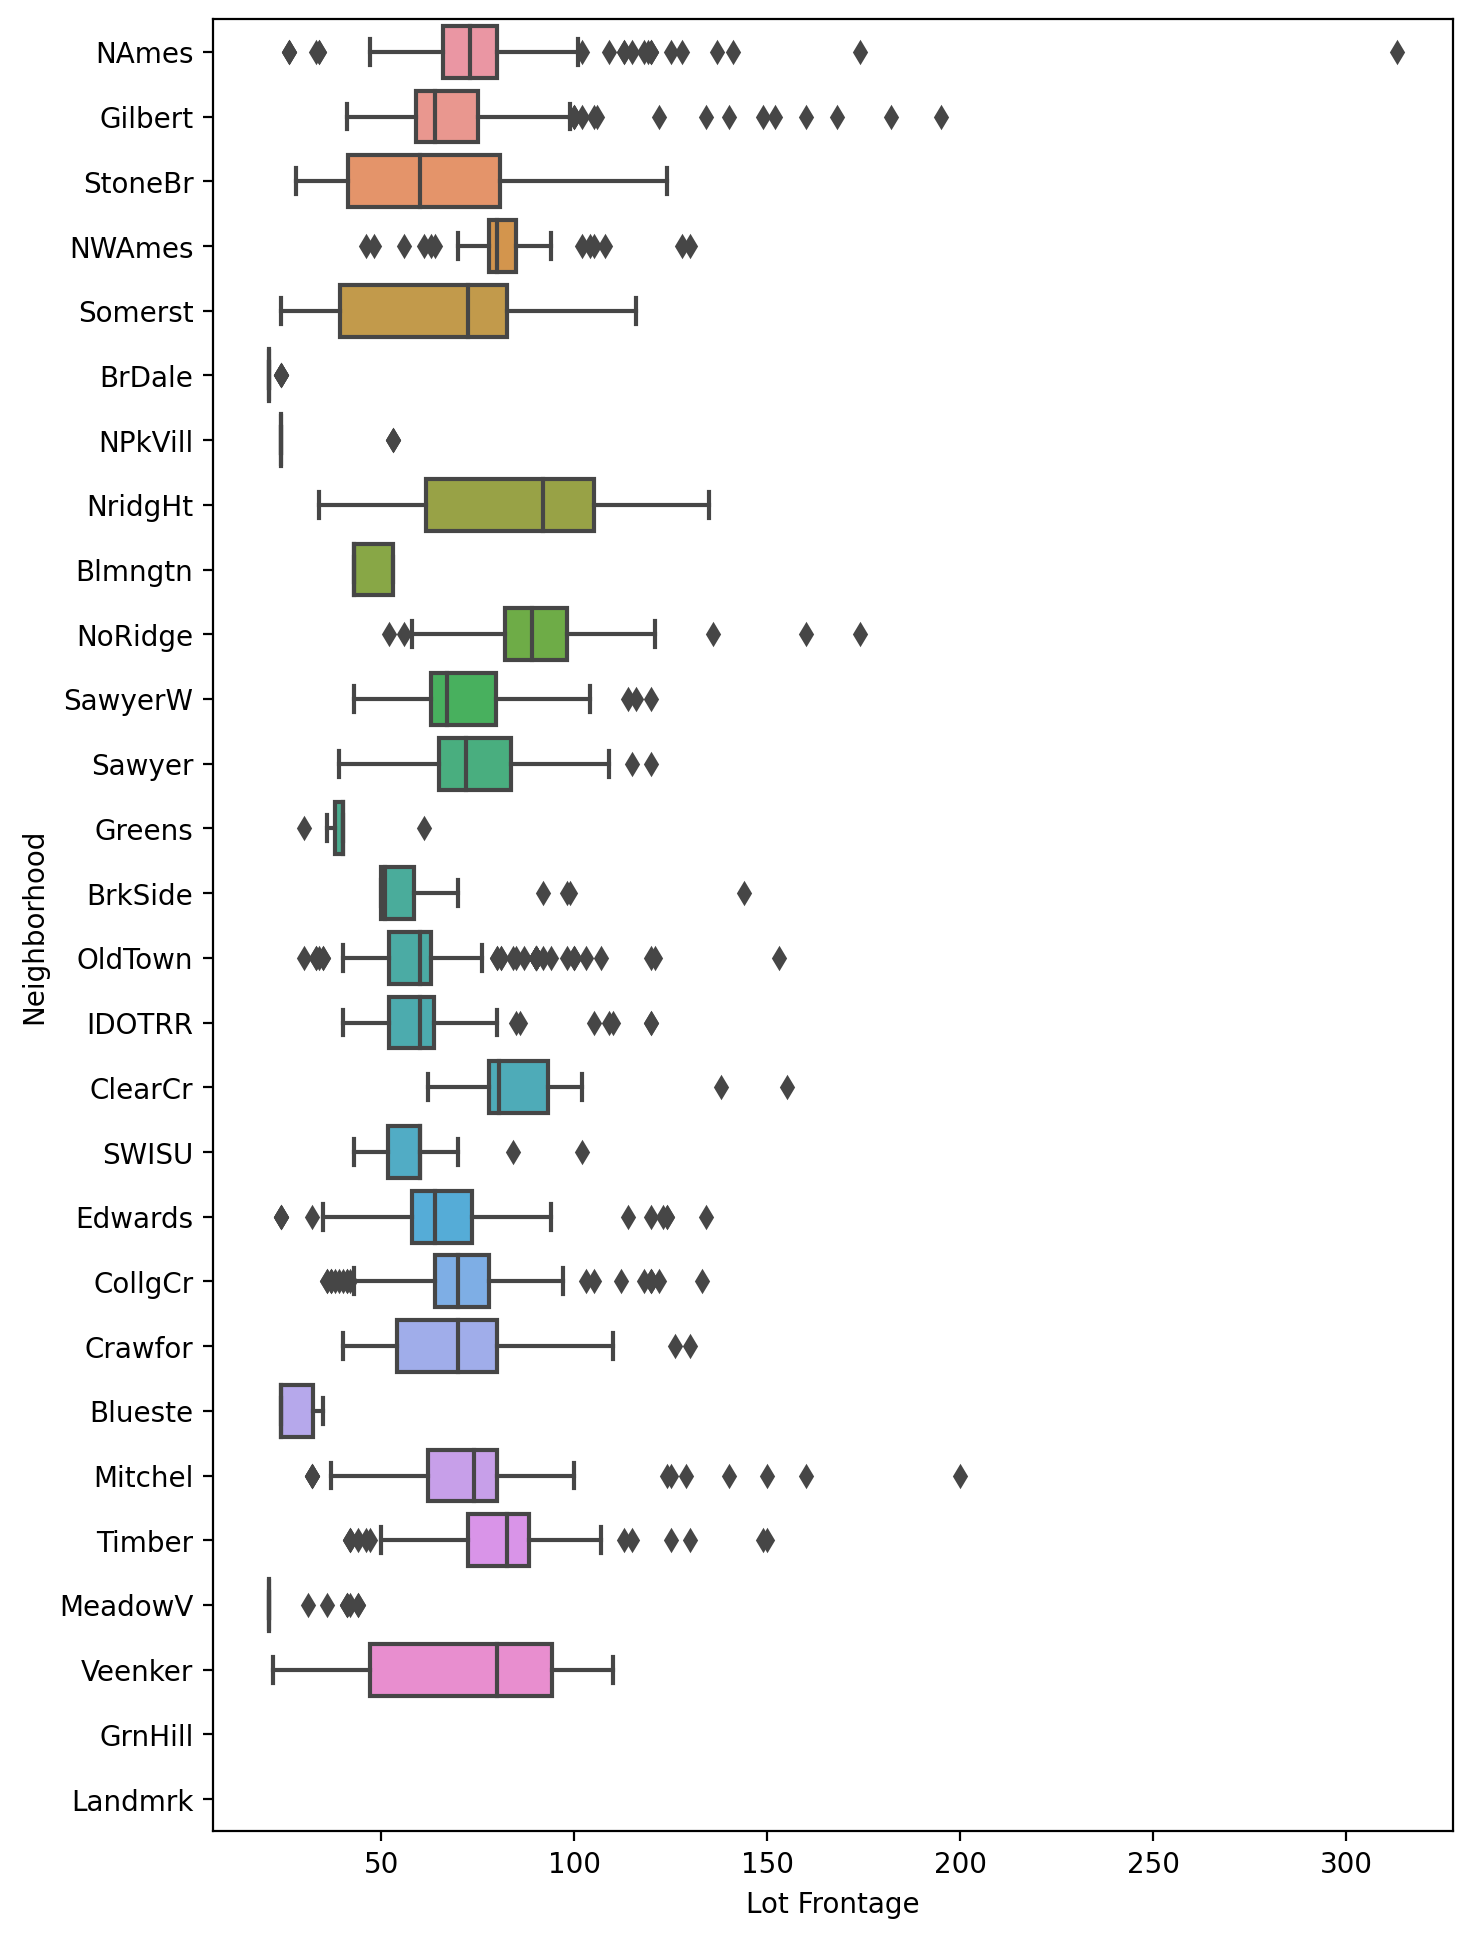

In [52]:
plt.figure(figsize=(8,12),dpi=200)
sns.boxplot(x='Lot Frontage', y= 'Neighborhood', data=df, orient='h')

In [53]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [54]:
df['Lot Frontage']=df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

In [55]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      3
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [56]:
df['Lot Frontage']= df['Lot Frontage'].fillna(0)

In [57]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [58]:
df['MS SubClass']=df['MS SubClass'].apply(str)

In [59]:
df.select_dtypes(include='object')

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,TA,Typ,None,Detchd,Unf,TA,TA,Y,WD,Normal
2926,20,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2927,85,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,Typ,None,None,None,None,None,Y,WD,Normal
2928,20,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [60]:
my_object_df = df.select_dtypes(include='object')

In [61]:
my_numeric_df=df.select_dtypes(exclude='object')

In [62]:
df_objects_dummies=pd.get_dummies(my_object_df,drop_first=True)

In [63]:
df_objects_dummies

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2926,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2928,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [64]:
final_df=pd.concat([my_numeric_df,df_objects_dummies],axis=1)

In [65]:
final_df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


In [66]:
final_df.corr()['SalePrice'].sort_values()

Exter Qual_TA       -0.591459
Kitchen Qual_TA     -0.527461
Fireplace Qu_None   -0.481740
Bsmt Qual_TA        -0.453022
Garage Finish_Unf   -0.422363
                       ...   
Garage Cars          0.648488
Total Bsmt SF        0.660983
Gr Liv Area          0.727279
Overall Qual         0.802637
SalePrice            1.000000
Name: SalePrice, Length: 274, dtype: float64

## Building Model

In [67]:
X= final_df.drop('SalePrice', axis=1)

In [68]:
y=final_df['SalePrice']

Train test split

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler= StandardScaler()

In [73]:
scaled_X_train=scaler.fit_transform(X_train)

In [74]:
scaled_X_test= scaler.transform(X_test)

Using elastic net model

In [75]:
from sklearn.linear_model import ElasticNet

In [76]:
base_elastic_model = ElasticNet(max_iter=1000000)

In [77]:
param_grid={'alpha':[0.1,1,5,10,100], 'l1_ratio':[.1,.7,.99,1]}

Using GridSearchCV for best parameters for model

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
grid_model= GridSearchCV(base_elastic_model,
                        param_grid=param_grid,
                        scoring='neg_mean_squared_error',
                        cv=5,verbose=1)

In [80]:
grid_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=ElasticNet(max_iter=1000000),
             param_grid={'alpha': [0.1, 1, 5, 10, 100],
                         'l1_ratio': [0.1, 0.7, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

### Best parameters for model

In [81]:
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

In [82]:
y_pred=grid_model.predict(scaled_X_test)

Errors Calculation

In [83]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [84]:
mean_absolute_error(y_test,y_pred)

14195.354900562173

In [85]:
np.sqrt(mean_squared_error(y_test,y_pred))

20558.508566893168

In [86]:
np.mean(df['SalePrice'])

180815.53743589742